In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
from pathlib import Path
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="darkgrid")

logdir = Path("/bigdata/cifar10/logs/rn18/decomposed")

In [3]:
from tddl.post_processing.path_utils import logdir_to_paths

paths = logdir_to_paths(logdir)

In [4]:
import os
from pandas import DataFrame

from tddl.post_processing.path_utils import logdir_to_df

df = logdir_to_df(logdir)


In [5]:
g = df.groupby(['factorization','rank','layer']).first()
df2 = g.reset_index()

In [6]:
df_select = df2[
    (df2['factorization'] == 'tucker') &
    (df2['rank'] == 0.5)
]

In [7]:
df_select['layer']

97     15.0
98     19.0
99     28.0
100    38.0
101    41.0
102    44.0
103    60.0
104    63.0
Name: layer, dtype: float64

In [8]:
import torch

from tddl.factorizations import get_weights
from tddl.post_processing.differences import weight_difference
from tddl.plotting.kde import kde_diff

resnet_layers = [0,6,9,12,15,19,22,25,28,31,35,38,41,44,47,51,54,57,60,63,66]

dfs = []
df_diffs = []
for index, row in df_select.iterrows():
    # print(index, row)

    weights_fact = get_weights(torch.load(row['model_fact'], map_location=torch.device('cpu')))
    weights_best = get_weights(torch.load(row['model_best'], map_location=torch.device('cpu')))
    weights_final = get_weights(torch.load(row['model_final'], map_location=torch.device('cpu')))

    layer = int(row['layer'])

    df = weight_difference(weights_fact, weights_final, resnet_layers, layer)
    dfs.append(df)
    df_diffs.append( df.explode(column='diff',ignore_index=True) )

/home/jetzeschuurman/gitProjects/phd/tltorch/tltorch/factorized_tensors/core.py:145: UserWarning: Creating a subclass of FactorizedTensor TensorizedTensor with no name.
  warnings.warn(f'Creating a subclass of FactorizedTensor {cls.__name__} with no name.')


contracted tensor of type: <class 'tltorch.factorized_tensors.factorized_tensors.TuckerTensor'>
contracted tensor of type: <class 'tltorch.factorized_tensors.factorized_tensors.TuckerTensor'>
contracted tensor of type: <class 'tltorch.factorized_tensors.factorized_tensors.TuckerTensor'>
contracted tensor of type: <class 'tltorch.factorized_tensors.factorized_tensors.TuckerTensor'>
contracted tensor of type: <class 'tltorch.factorized_tensors.factorized_tensors.TuckerTensor'>
contracted tensor of type: <class 'tltorch.factorized_tensors.factorized_tensors.TuckerTensor'>
contracted tensor of type: <class 'tltorch.factorized_tensors.factorized_tensors.TuckerTensor'>
contracted tensor of type: <class 'tltorch.factorized_tensors.factorized_tensors.TuckerTensor'>


KeyboardInterrupt: 

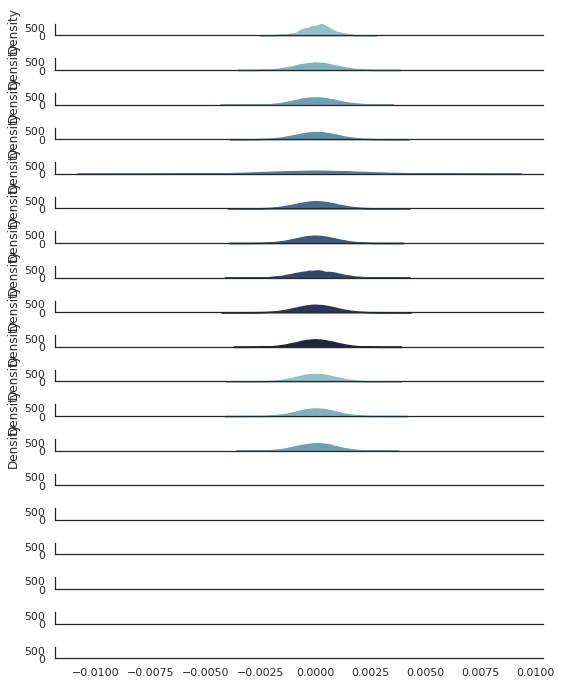

In [12]:
for df_diff in df_diffs:
    layer = df_diff['fact_nr'][0]
    kde_diff(
        df_diff,
        resnet_layers[:18]+[66],
        Path(f'../../plots/rn18_c10_difference_kde_{layer}.pdf'),
    )


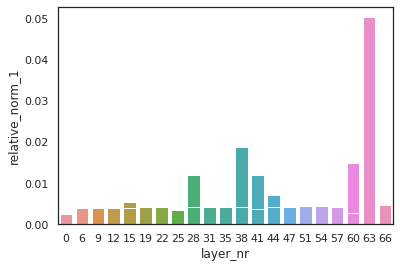

In [23]:
from tddl.plotting.bar import bar_diff

for df in dfs:
    layer = df['fact_nr'][0]
    f = bar_diff(
        df,
        x = "layer_nr",
        y = 'relative_norm_1',
        save_path=Path(f'../../plots/rn18_c10_difference_relnorm1_{layer}.pdf'),
    )

    # fig = sns.barplot(data=df, x="layer_nr", y="relative_norm_1")
    # fig.get_figure().savefig(f'../../plots/rn18_c10_difference_relnorm1_{layer}.pdf')


In [ ]:
for df in dfs:
    layer = df['fact_nr'][0]
    fig = sns.barplot(data=df, x="layer_nr", y="norm_1")
    fig.get_figure().savefig(f'../../plots/rn18_c10_difference_norm1_{layer}.pdf')
    

In [15]:
# logdir_model = logdir_i / "rn18-lr-[15]-tucker-0.5-dTrue-iNone_bn_128_sgd_l1e-05_g0.0_sTrue" 

# model_best = torch.load(logdir_model / "fact_model_best.pth")
# model_final = torch.load(logdir_model / "fact_model_final.pth")
# model_fact = torch.load(logdir_model / "model_after_fact.pth")

In [17]:
# loop over layers to get list with the weights

# from tddl.factorizations import number_layers, listify_numbered_layers, get_weights

# resnet_layers = [0,6,9,12,15,19,22,25,28,31,35,38,41,44,47,51,54,57,60,63,66]

# weights_fact = get_weights(model_fact, resnet_layers)
# weights_best = get_weights(model_best, resnet_layers)
# weights_final = get_weights(model_final, resnet_layers)

In [13]:
from tddl.post_processing.differences import weight_difference

df = weight_difference(weights_fact, weights_best, resnet_layers, '15')
df_diff = df.explode(column='diff',ignore_index=True)

contracted tensor of type: <class 'tltorch.factorized_tensors.factorized_tensors.TuckerTensor'>


In [14]:
df_diff

,layer_nr,fact_nr,norm_2,norm_1,diff,relative_norm_2,relative_norm_1
0,0,15,0.022520,0.745379,0.001276,0.002605,0.002520
1,0,15,0.022520,0.745379,0.00108,0.002605,0.002520
2,0,15,0.022520,0.745379,0.000981,0.002605,0.002520
3,0,15,0.022520,0.745379,0.001036,0.002605,0.002520
4,0,15,0.022520,0.745379,0.001016,0.002605,0.002520
...,...,...,...,...,...,...,...
11164347,66,15,0.063291,3.529102,0.000143,0.004516,0.004647
11164348,66,15,0.063291,3.529102,-0.000087,0.004516,0.004647
11164349,66,15,0.063291,3.529102,0.000539,0.004516,0.004647
11164350,66,15,0.063291,3.529102,0.0017,0.004516,0.004647


/home/jetzeschuurman/gitProjects/phd/tddl/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/home/jetzeschuurman/gitProjects/phd/tddl/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


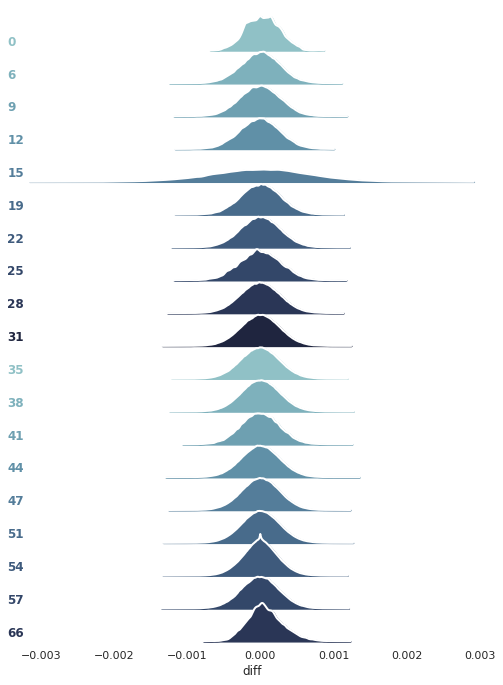

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df_diff.loc[df_diff.layer_nr.isin(resnet_layers[:18]+[66])], row="layer_nr", hue="layer_nr", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "diff",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "diff", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "diff")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

g.savefig('../../plots/rn18_c10_difference_kde.pdf')

In [88]:
df_diff

,layer_nr,fact_nr,norm_2,norm_1,diff
0,0,15,0.009295,0.314991,0.000195
1,0,15,0.009295,0.314991,0.000107
2,0,15,0.009295,0.314991,-0.000119
3,0,15,0.009295,0.314991,0.000217
4,0,15,0.009295,0.314991,0.000108
...,...,...,...,...,...
11164347,66,15,0.017950,0.992532,-0.000021
11164348,66,15,0.017950,0.992532,0.000012
11164349,66,15,0.017950,0.992532,0.000019
11164350,66,15,0.017950,0.992532,0.000324


<AxesSubplot:xlabel='diff', ylabel='Density'>

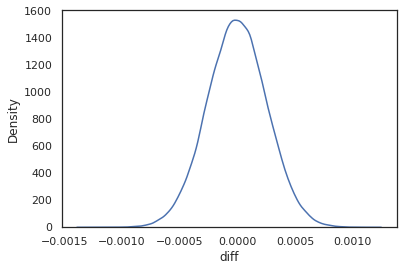

In [119]:
resnet_layers = [0,6,9,12,15,19,22,25,28,31,35,38,41,44,47,51,54,57,60,63,66]
df_diff.nr = df_diff.layer_nr.astype(str)
sns.kdeplot(data=df_diff[df_diff.layer_nr.isin([57])], x='diff', common_norm=True)

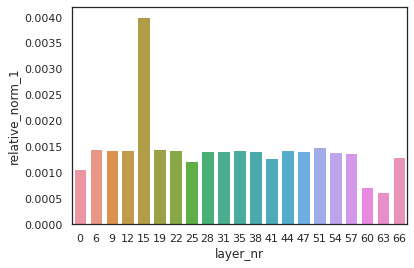

In [146]:
fig = sns.barplot(data=df, x="layer_nr", y="relative_norm_1")
fig.get_figure().savefig('../../plots/rn18_c10_difference_relnorm1.pdf')

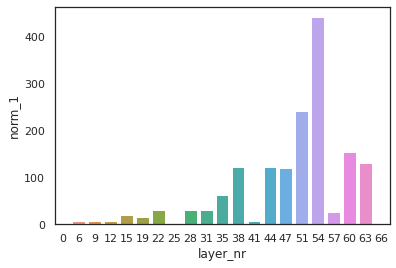

In [147]:
fig = sns.barplot(data=df, x="layer_nr", y="norm_1")
fig.get_figure().savefig('../../plots/rn18_c10_difference_norm1.pdf')

In [9]:
df_ = pd.concat(dfs)
df_['log_rel_norm_1'] = np.log(df_["relative_norm_1"])

df_pivot = df_.pivot("fact_nr", "layer_nr", "relative_norm_1")
df_pivot_log = df_.pivot("fact_nr", "layer_nr", "log_rel_norm_1")


In [10]:
df_pivot_log

layer_nr,0,6,9,12,15,19,22,25,28,31,...,38,41,44,47,51,54,57,60,63,66
fact_nr,,,,,,,,,,,,,,,,,,,,,
15,-5.762491,-5.312725,-5.314447,-5.315912,-4.301514,-5.289667,-5.320385,-5.473607,-5.349809,-5.346819,...,-5.340534,-5.437636,-5.343364,-5.327168,-5.281175,-5.303275,-5.357381,-5.632265,-5.885784,-5.310310
19,-5.821881,-5.331283,-5.346273,-5.351410,-5.348591,-4.169927,-5.331003,-5.516743,-5.347462,-5.339661,...,-5.330360,-5.429062,-5.336891,-5.341254,-5.294472,-5.291870,-5.357743,-5.514059,-5.793587,-5.295619
28,-5.663962,-5.307930,-5.307133,-5.292830,-5.277271,-5.239668,-5.218408,-5.408857,-3.854395,-5.198319,...,-5.216413,-5.318408,-5.216284,-5.217005,-5.190941,-5.218376,-5.257025,-5.666290,-5.665456,-5.276892
38,-5.819689,-5.407972,-5.387773,-5.379324,-5.348894,-5.328500,-5.347871,-5.553296,-5.377918,-5.377269,...,-3.808391,-5.445514,-5.348052,-5.325166,-5.287234,-5.302641,-5.363775,-5.541130,-5.899204,-5.252564
41,-5.893462,-5.425889,-5.413115,-5.405963,-5.386342,-5.360021,-5.371345,-5.568520,-5.383332,-5.359464,...,-5.343095,-3.784647,-5.354219,-5.354451,-5.313053,-5.312525,-5.381028,-5.919356,-5.977401,-5.331661
44,-5.772989,-5.439375,-5.413101,-5.401249,-5.377214,-5.331820,-5.346006,-5.528705,-5.370855,-5.364529,...,-5.352849,-5.450899,-3.813082,-5.335252,-5.275741,-5.280776,-5.348489,-5.683060,-5.974831,-5.223333
60,-5.862580,-5.422031,-5.400653,-5.398470,-5.403481,-5.357140,-5.361878,-5.564012,-5.377100,-5.370109,...,-5.351396,-5.448637,-5.361252,-5.353206,-5.311366,-5.318129,-5.362551,-2.516154,-6.017043,-5.266822
63,-6.003419,-5.432622,-5.424212,-5.404177,-5.410598,-5.350914,-5.351431,-5.560383,-5.366670,-5.363628,...,-5.345224,-5.441555,-5.348552,-5.322368,-5.286857,-5.293938,-5.339786,-5.690355,-2.748993,-5.186022


<AxesSubplot:xlabel='layer_nr', ylabel='fact_nr'>

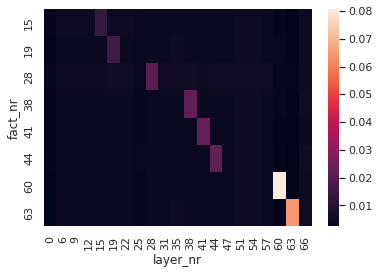

In [11]:
sns.heatmap(df_pivot)

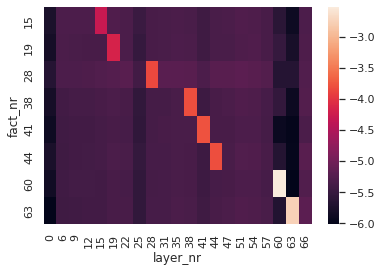

In [23]:
# f = sns.heatmap(df_pivot_log)
# f.get_figure().savefig('../../plots/rn18_c10_difference_heat_cont_log_rel_norm1_best.pdf')

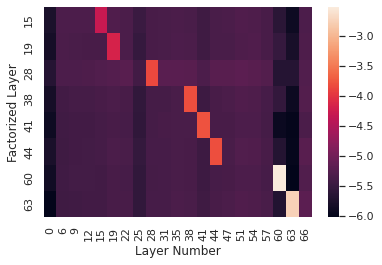

In [21]:
import matplotlib.pyplot as plt
ax = sns.heatmap(df_pivot_log)
ax.set(xlabel='Layer Number', ylabel='Factorized Layer')
# f.get_figure().savefig('../../plots/rn18_c10_difference_heat_cont_log_rel_norm1_final_0.pdf')
plt.subplots_adjust(bottom=0.15)
plt.savefig('../../plots/rn18_c10_difference_heat_cont_log_rel_norm1_final_0.pdf')


In [45]:
df_diff_ = pd.concat(df_diffs)
df_diff_['log_norm_1'] = np.log(df_diff_["norm_1"])

# df_pivot = df_diff_.pivot("fact_nr", "layer_nr", "norm_1")
# sns.heatmap(df_pivot)

# df_pivot_log = df_diff_.pivot("fact_nr", "layer_nr", "log_norm_1")
# sns.heatmap(df_pivot_log)

ValueError: Index contains duplicate entries, cannot reshape